# Exploratory Analysis

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
circuits_df = pd.read_csv('../Resources/Dataset/circuits.csv')
drivers_df = pd.read_csv('../Resources/Dataset/drivers.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')

# Join Tables

In [3]:
# Join results with drivers dataset.
res_dr_df = pd.merge(results_df,drivers_df,how='left',on='driverId')

# Join races dataset.
res_dr_rc_df = pd.merge(res_dr_df,races_df,how='left',on='raceId')

# Join circuits dataset.
merged_df = pd.merge(res_dr_rc_df,circuits_df,how='left',on='circuitId')

In [4]:
# Drop columns.
merged_df = merged_df.drop(columns=['resultId','raceId','constructorId','number_x','grid','positionText','positionOrder','rank',
                                    'points','laps','time_x','milliseconds','fastestLap','fastestLapTime','fastestLapSpeed',
                                    'statusId','number_y','code','forename','surname','dob','url_x','round','date','time_y','url_y',
                                    'circuitRef','name_y','location','lat','lng','alt','url','year','circuitId','name_x'])

In [5]:
# Replace all \\N in position column to 99.
merged_df['position'] = merged_df['position'].replace({'\\N':99})

# Convert position from object to numeric.
merged_df['position'] = pd.to_numeric(merged_df['position'])
merged_df

,driverId,position,driverRef,nationality,country
0,1,1,hamilton,British,Australia
1,2,2,heidfeld,German,Australia
2,3,3,rosberg,German,Australia
3,4,4,alonso,Spanish,Australia
4,5,5,kovalainen,Finnish,Australia
...,...,...,...,...,...
25035,849,16,latifi,Canadian,Spain
25036,4,17,alonso,Spanish,Spain
25037,854,18,mick_schumacher,German,Spain
25038,853,19,mazepin,Russian,Spain


# Visualizations

In [6]:
# Consider position 1,2,3 values.
merged_df['position']= merged_df ['position'].loc[merged_df['position']<4]
merged_df['position'] = pd.to_numeric(merged_df['position'])

In [7]:
# Drop NAN values.
merged_df = merged_df.dropna().reset_index()

In [8]:
# Define a function for nationality and country.
def countries(nationality,country):
    if ((nationality== 'American') and (country == 'USA')):
        return 'Yes'
    elif ((nationality == 'Argentine') and (country == 'Argentina')):
        return 'Yes'
    elif ((nationality == 'Australian') and (country == 'Australia')):
        return 'Yes'
    elif ((nationality == 'Austrian') and (country == 'Austria')):
        return 'Yes'
    elif ((nationality == 'Belgian') and (country == 'Belgium')):
        return 'Yes'
    elif ((nationality == 'Brazilian') and (country == 'Brazil')):
        return 'Yes'
    elif ((nationality == 'British') and (country == 'UK')):
        return 'Yes'
    elif ((nationality == 'Canadian') and (country == 'Canada')):
        return 'Yes'
    elif ((nationality == 'Dutch') and (country == 'Netherlands')):
        return 'Yes'
    elif ((nationality == 'East German') and (country == 'Germany')):
        return 'Yes'
    elif ((nationality == 'French') and (country == 'France')):
        return 'Yes'
    elif ((nationality == 'German') and (country == 'Germany')):
        return 'Yes'
    elif ((nationality == 'Hungarian') and (country == 'Hungary')):
        return 'Yes'
    elif ((nationality == 'Indian') and (country == 'India')):
        return 'Yes'
    elif ((nationality == 'Italian') and (country == 'Italy')):
        return 'Yes'
    elif ((nationality == 'Japanese') and (country == 'Japan')):
        return 'Yes'
    elif ((nationality == 'Liechtensteiner') and (country == 'Germany')):
        return 'Yes'
    elif ((nationality == 'Malaysian') and (country == 'Malaysia')):
        return 'Yes'
    elif ((nationality == 'Mexican') and (country == 'Mexico')):
        return 'Yes'
    elif ((nationality == 'Monegasque') and (country == 'Monaco')):
        return 'Yes'
    elif ((nationality == 'Portuguese') and (country == 'Portugal')):
        return 'Yes'
    elif ((nationality == 'Russian') and (country == 'Russia')):
        return 'Yes'
    elif ((nationality == 'South African') and (country == 'South Africa')):
        return 'Yes'
    elif ((nationality == 'Spanish') and (country == 'Spain')):
        return 'Yes'
    elif ((nationality == 'Swedish') and (country == 'Sweden')):
        return 'Yes'
    elif ((nationality == 'Swiss') and (country == 'Switzerland')):
        return 'Yes'
    elif ((nationality == 'American-Italian') and (country == 'USA' | country == 'Italy')):
        return 'Yes'
    elif ((nationality == 'Argentine-Italian') and (country == 'Argentina' | country == 'Italy')):
        return 'Yes'
    else:
        return 'No'
    
merged_df['homeWin'] = merged_df.apply(lambda x: countries(x['nationality'],x['country']),axis=1)
merged_df

,index,driverId,position,driverRef,nationality,country,homeWin
0,0,1,1.0,hamilton,British,Australia,No
1,1,2,2.0,heidfeld,German,Australia,No
2,2,3,3.0,rosberg,German,Australia,No
3,22,8,1.0,raikkonen,Finnish,Malaysia,No
4,23,9,2.0,kubica,Polish,Malaysia,No
...,...,...,...,...,...,...,...
3133,25001,830,2.0,max_verstappen,Dutch,Portugal,No
3134,25002,822,3.0,bottas,Finnish,Portugal,No
3135,25020,1,1.0,hamilton,British,Spain,No
3136,25021,830,2.0,max_verstappen,Dutch,Spain,No


In [9]:
# Merged_df is saved as a driver_nationality.csv file.
merged_df.to_csv('../Resources/Dataset/driver_nationality.csv')

In [10]:
# X and Y values.
hmw_y = merged_df[['nationality','homeWin']].loc[merged_df['homeWin'] == 'Yes']
hmw_y_ct = hmw_y.groupby(['nationality']).count()
x = hmw_y['nationality'].unique()
x.sort()
y = hmw_y_ct['homeWin']

<Figure size 432x288 with 0 Axes>

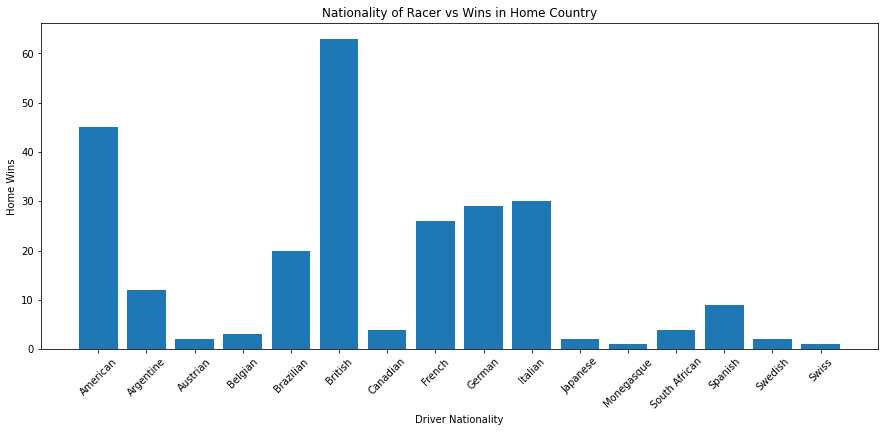

In [11]:
# Plot a Bar chart
fig = plt.figure()
plt.figure(figsize=(15, 6))
plt.bar(x, y)
plt.title('Nationality of Racer vs Wins in Home Country')
plt.xlabel('Driver Nationality')
plt.ylabel('Home Wins')
plt.xticks(rotation=45);

In [12]:
# Count the homewin values.
home_win = merged_df['homeWin'].value_counts()
home_win

No     2885
Yes     253
Name: homeWin, dtype: int64

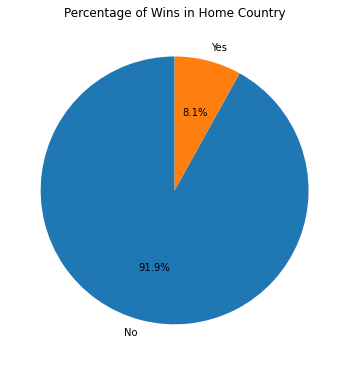

In [13]:
# Plot a pie chart
x = ['No', 'Yes']
y = home_win
plt.subplots(figsize=(6, 8))
plt.pie(y, labels=x, startangle=90, autopct='%.1f%%')
plt.title('Percentage of Wins in Home Country')
plt.show()